In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
import joblib

In [4]:
# Load dataset
df = pd.read_csv("irrigation_machine.csv")

In [5]:
# Clean data
df = df.drop(columns=["Unnamed: 0"])

In [6]:
# Split features and targets
X = df.drop(columns=["parcel_0", "parcel_1", "parcel_2"])
y = df[["parcel_0", "parcel_1", "parcel_2"]]

In [7]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [10]:
# Train multi-output classifier
model = MultiOutputClassifier(DecisionTreeClassifier(random_state=42))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [11]:
# Accuracy, Precision, Recall summary
summary = pd.DataFrame({
    "Accuracy": [accuracy_score(y_test.iloc[:, i], y_pred[:, i]) for i in range(3)],
    "Precision": [precision_score(y_test.iloc[:, i], y_pred[:, i]) for i in range(3)],
    "Recall": [recall_score(y_test.iloc[:, i], y_pred[:, i]) for i in range(3)]
}, index=y.columns)

print("\n📊 Summary Metrics:")
print(summary)


📊 Summary Metrics:
          Accuracy  Precision    Recall
parcel_0    0.7875   0.830116  0.839844
parcel_1    0.8175   0.902439  0.851974
parcel_2    0.8075   0.564103  0.505747


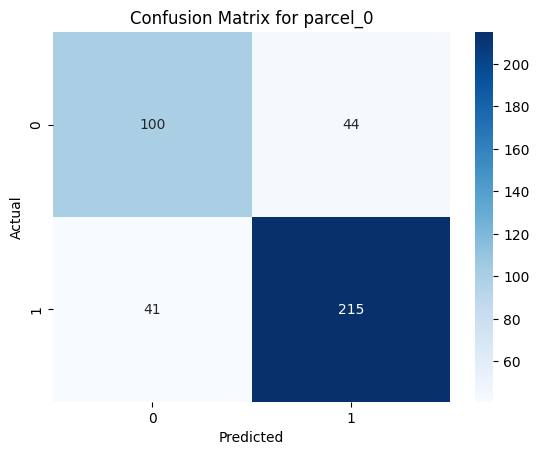

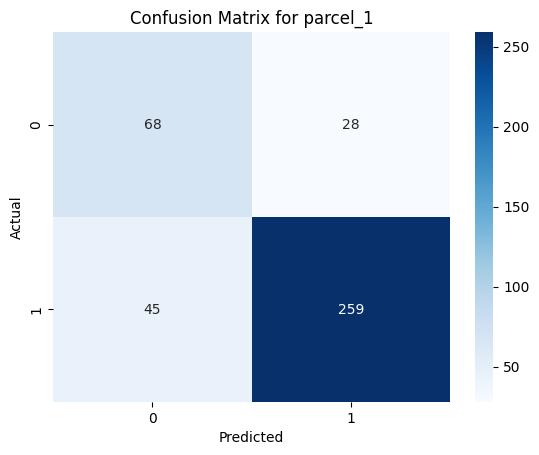

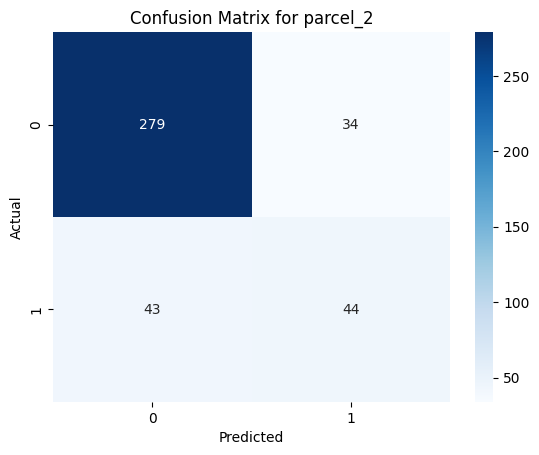

In [12]:
# Confusion matrices
for i, col in enumerate(y.columns):
    cm = confusion_matrix(y_test.iloc[:, i], y_pred[:, i])
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {col}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

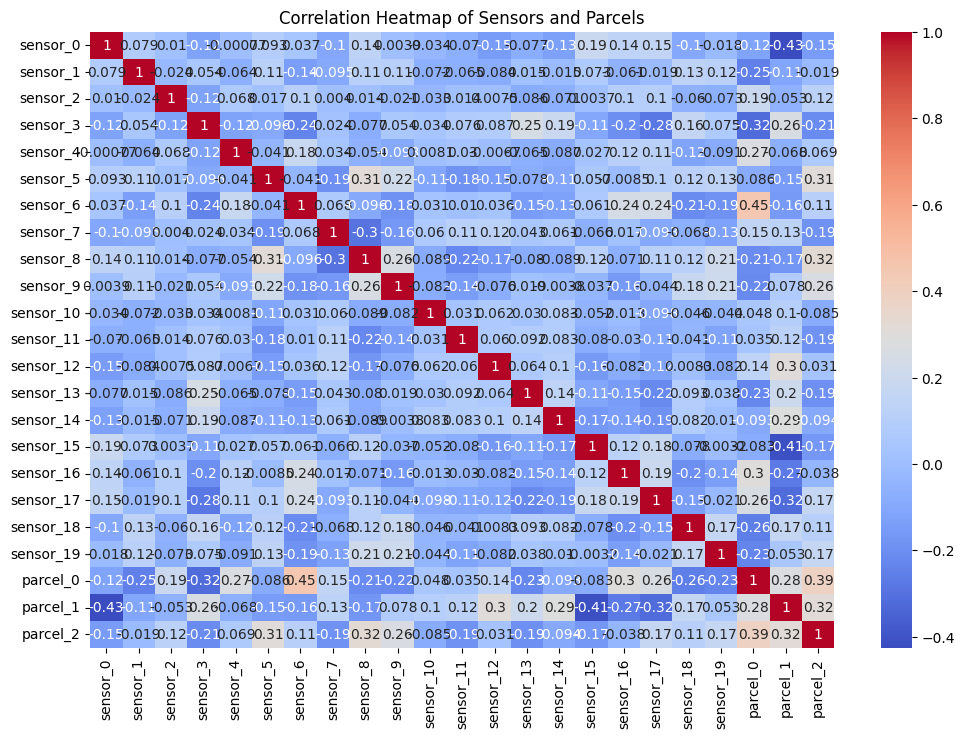

In [13]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Sensors and Parcels")
plt.show()

In [14]:
# Feature importance (average over all trees)
importances = np.mean(
    [est.feature_importances_ for est in model.estimators_],
    axis=0
)
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

/tmp/ipython-input-15-3013952103.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(10), x="Importance", y="Feature", palette="viridis")


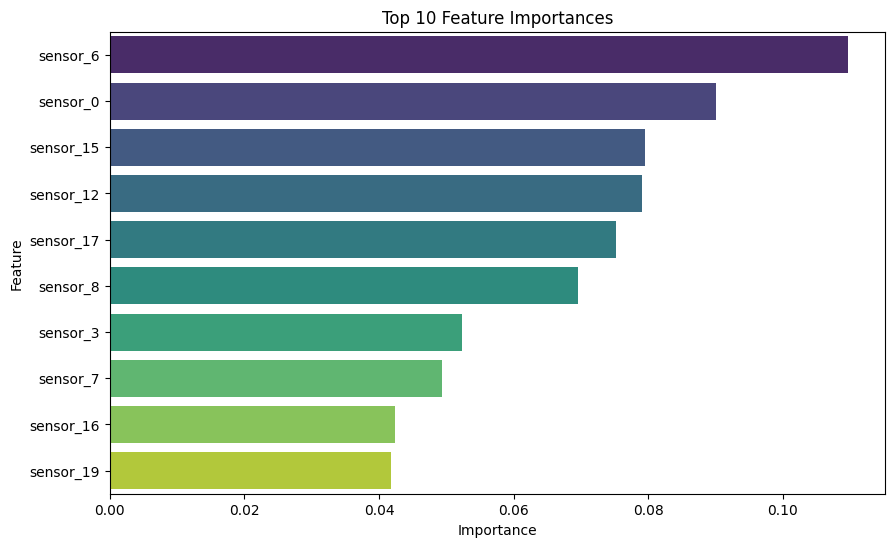

In [15]:
# Plot top features
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x="Importance", y="Feature", palette="viridis")
plt.title("Top 10 Feature Importances")
plt.show()

In [16]:
# Save model, scaler, predictions
joblib.dump(model, "Irrigation_Model.pkl")
joblib.dump(scaler, "Scaler.pkl")
pd.DataFrame(y_pred, columns=y.columns).to_csv("Irrigation_Predictions.csv", index=False)

print("✅ Model, scaler, and predictions saved.")

✅ Model, scaler, and predictions saved.
